In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

def create_fcc_lattice(N):
    """ Create an FCC lattice of size N x N x N (each cell contains 4 atoms). """
    L = 2*N  # linear size of the cubic lattice
    spins = np.random.choice([-1, 1], (L, L, L))
    return spins

def get_neighbors(x, y, z, L):
    """ Get indices of the 12 nearest neighbors in an FCC lattice. """
    return [(x, (y+1)%L, (z+1)%L), (x, (y-1)%L, (z-1)%L),
            ((x+1)%L, y, (z+1)%L), ((x-1)%L, y, (z-1)%L),
            ((x+1)%L, (y+1)%L, z), ((x-1)%L, (y-1)%L, z),
            (x, (y+1)%L, (z-1)%L), (x, (y-1)%L, (z+1)%L),
            ((x+1)%L, y, (z-1)%L), ((x-1)%L, y, (z+1)%L),
            ((x+1)%L, (y-1)%L, z), ((x-1)%L, (y+1)%L, z)]

def metropolis_step(spins, beta):
    """ Perform one Metropolis update on the spins array. """
    L = len(spins)
    for _ in range(L**3):
        x, y, z = np.random.randint(0, L, 3)
        spin = spins[x, y, z]
        delta_E = 2 * spin * sum(spins[nx, ny, nz] for nx, ny, nz in get_neighbors(x, y, z, L))
        if delta_E < 0 or random.random() < np.exp(-beta * delta_E):
            spins[x, y, z] *= -1

# @njit
def simulate(N, temp, steps):
    """ Run the Ising model simulation on an FCC lattice. """
    beta = 1.0 / temp
    spins = create_fcc_lattice(N)
    magnetizations = []

    for step in range(steps):
        metropolis_step(spins, beta)
        magnetizations.append(np.sum(spins))

    return magnetizations


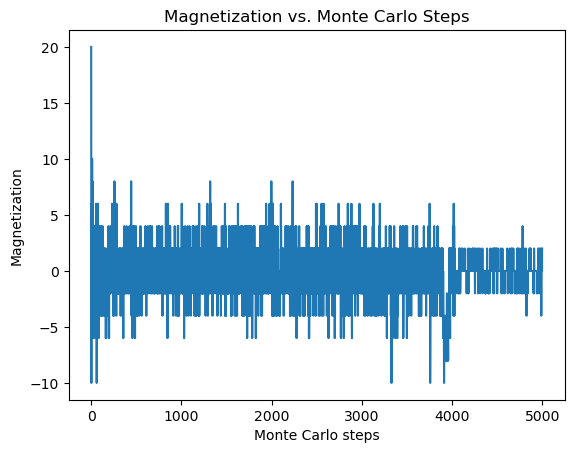

In [5]:
# Parameters
N = 4  # Size of the FCC lattice (creates 2N x 2N x 2N cubic lattice)
temperature = 1
steps = 5000

# Run the simulation
magnetizations = simulate(N, temperature, steps)

# Plotting the results
plt.plot(magnetizations)
plt.xlabel('Monte Carlo steps')
plt.ylabel('Magnetization')
plt.title('Magnetization vs. Monte Carlo Steps')
plt.show()